<a href="https://colab.research.google.com/github/Welle-Kim/Based-on-the-Review/blob/master/1_%EC%9B%B9_%ED%81%AC%EB%A1%A4%EB%A7%81_%EA%B8%B0%EB%B3%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 웹 크롤링
- 웹 크롤러(Web Crawler)는 웹문서, 이미지 등을 주기적으로 수집하여 자동으로 데이터베이스화하는 프로그램
- 크롤러가 하는 작업을 웹 크롤링(Web Carwling)이라 함
- requests와 beautifulsoup4 패키지 사용

### 1. 웹 문서 전체 가져오기
- urllib.request 패키지


<!DOCTYPE doctype html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="tw
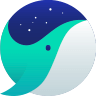
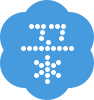

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs

html = urlopen("https://www.naver.com/")
soup = bs(html, "html.parser")
print(soup)

- requests 패키지

In [2]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("https://www.naver.com/")
soup = bs(html.text, "html.parser")
#print(soup)

### 2. html 태그에서 원하는 정보 추출하기
- html 태그를 이용하는 방법
- CSS Selector를 이용하는 방버

#### html 태그: 
 * find("태그")-첫번째 태그만 검색
 * find_all("태그")-태그 전체를 검색(List로 반환)

In [3]:
# class를 이용한 태그 검색
find_div = soup.find("div", class_="group_nav")
find_div

# id를 이용한 태그 검색
find_div = soup.find('div', id="NM_FAVORITE")
find_div

<div class="gnb_inner" id="NM_FAVORITE">
<div class="group_nav">
<ul class="list_nav type_fix">
<li class="nav_item">
<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>
</li>
<li class="nav_item"><a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a></li>
<li class="nav_item"><a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a></li>
<li class="nav_item"><a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a></li>
<li class="nav_item"><a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a></li>
<li class="nav_item"><a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a></li>
<li class="nav_item">
<a class="nav" data-clk="svc.tvcast" 

In [4]:
# find_all 사용
find_div = soup.find("div", class_="group_nav")
find_lst = find_div.find_all("li")
for item in find_lst:
    print(item.get_text())   # 모든 태그를 제거하고 텍스트만 남김
    #print(item.text)         # 태그 내에 있는 텍스트를 추출
    print(item.find("a")["href"])  # 태그의 속성을 출력


메일

https://mail.naver.com/
카페
https://section.cafe.naver.com/
블로그
https://section.blog.naver.com/
지식iN
https://kin.naver.com/
쇼핑
https://shopping.naver.com/
쇼핑LIVE
https://shoppinglive.naver.com/home
Pay
https://order.pay.naver.com/home

TV

https://tv.naver.com/
사전
https://dict.naver.com/
뉴스
https://news.naver.com/
증권
https://finance.naver.com/
부동산
https://land.naver.com/
지도
https://map.naver.com/
VIBE
https://vibe.naver.com/
책
https://book.naver.com/
웹툰
https://comic.naver.com/


#### CSS Selector

In [5]:
css_soup=soup.select("#NM_FAVORITE > div.group_nav > ul.list_nav.type_fix")  # 리스트 형식으로 출력
css_a = css_soup[0].find_all("a")
for a in css_a:
    print(a.text)

메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV


#### [크롤링 연습]
- 네이버 지식인에서 "선릉역"으로 검색후 검색결과에서 첫번쩨 데이터 가져오기

In [9]:
import requests
from bs4 import BeautifulSoup as bs

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

# 검색된 li에서 원하는 텍스트 크롤링(추출)
print(li_soup[0].find("dt").get_text())  # 제목
print(li_soup[0].find("dd").get_text())  # 날짜
# print(li_soup[0].select("dl > dd:nth-child(3)")[0].get_text())  # 요약 내용
print(li_soup[0].find_all("dd")[1].get_text()) #요약 내용



볼 수 있을까요? (선릉역 20대후반/여 질염)


2022.03.29.
예전에 한 번 선릉역 근처에 있는 산부인과에서 질염 치료제로 약 처방 받고 복용했는데요, 다시 재발한 거 같아요 재발 심하다는 말 듣기는 했는데 막상 또 걸리니까... 


### [미션] 1페이지 검색 결과에서 전체 내용 가져오기
- 제목, 등록일, 요약 부분을 각각 가져와 DataFrame으로 저장

In [11]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=%EC%84%A0%EB%A6%89%EC%97%AD&page=1"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

,제목,등록일,요약
0,볼 수 있을까요? (선릉역 20대후반/여 질염),2022.03.29.,예전에 한 번 선릉역 근처에 있는 산부인과에서 질염 치료제로 약 처방 받고 복용했는...
1,성수동에서 지하철 타서 선릉역까지 가,2022.02.05.,성수동에서 지하철 타서 선릉역까지 가는 거로 1회용 지하철 카드? 그거 했는데......
2,부천역에서 선릉역 지하철 거리비례제,2022.06.13.,부천역에서 선릉역까지 지하철 정기권 거리비례제로하면 몇단계로 이용가능한지 알 수 있...
3,부천역에서 선릉역까지 31키로 정도,2022.06.18.,부천역에서 선릉역까지 31키로 정도 원룸이사 비용 얼마나 들까요 상차는 제가 못도와...
4,선릉역에서 수인분당선,2022.04.01.,선릉역에서 수인분당선을 타려면 어디 출구로 가야하나요? 타는곳이 여러곳이잖아요......
5,파주 야당역에서 서울 강남 선릉역까지...,2022.05.06.,파주 야당역에서 서울 강남 선릉역까지 출퇴근하기 힘든가요 ?? 그리고 파주 애기들과...
6,동서울터미널에서 선릉역 까지 노선 좀,2022.01.02.,"동서울터미널에서 선릉역 까지 노선 좀 알려주세요? ""강변 - 잠실나루 - 잠실 -..."
7,증미역에서 선릉역까지 가는 가장 빠른...,2021.09.12.,9호선일반 증미역에서 선릉역9호선급행까지 가는 방법이... 추천해주세요 출퇴근시간이...
8,선릉역 근처 보건증,2022.07.05.,선릉역근처보건증발급병원이있나요 [1:1 질문사항에 대한 답변입니다.] 안녕하세요....
9,선릉역 기획부동산 사기,2022.05.20.,어머니께서 선릉역 쪽에 있는 부동산 다니다가 토지매매계약서를 썼는데 그 부동산회사가...


### 3. 검색어를 이용한 크롤링
- urllib 패키지의 parse 모듈

In [12]:
# parse 모듈 사용법
from urllib import parse

text = "선릉역"

# 사람의 언어를 컴퓨터 언어로 인코딩
enc = parse.quote(text)  
print(enc)

# 컴퓨터 언어를 사람이 알아볼 수 있는 상태로 디코딩
dec = parse.unquote("%EC%84%A0%EB%A6%89%EC%97%AD") 
print(dec)

%EC%84%A0%EB%A6%89%EC%97%AD
선릉역


In [13]:
import requests
from urllib import parse
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text=input("검색어 입력: ")

# 크롤링 대상 url 
url="https://kin.naver.com/search/list.naver?query=" + parse.quote(text) + "&page=1"

html = requests.get(url)   # url에서 데이터 요청
soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

# css를 이용한 태그 검색
ul_soup=soup.select("#s_content > div.section > ul") 

# 검색된 태그에서 다시 li 전체를 검색
li_soup=ul_soup[0].find_all("li")

nav_kin = []
for li in li_soup:
    title = li.find("dt").get_text().replace("\n", "")
    date = li.find_all("dd")[0].get_text()
    doct = li.find_all("dd")[1].get_text()
    # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
    nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

검색어 입력: 음성학


,제목,등록일,요약
0,영어음성학 혀의구성,2022.04.09.,"영어음성학을 배우고 있는 학생인데요 혀의 구성이 헷갈려서요 첨부한 사진에 10, 1..."
1,영어음성학 vowel chart,2022.04.17.,동그라미 친 2개가 뭐가 다른거죠? 각 예시단어 하나씩 들어주세요... 똑같은 a같...
2,영어음성학 ej에 대해서,2022.04.12.,ej라는 발음표기는 없죠? 블로그에서 잘 정리된 글을 봤는데 거기서 [ej] 발음해...
3,음성학의 하위분야? 언어학의 하위분야?,2020.03.29.,"... 음운론,형태론,통사론,의미론,화용론이 음성학의 하위분야인건가요? 아니면 언어..."
4,영어음성학에서 조음장소,2006.04.03.,제가 이제 막 음성학을 배우는 2학년인데요 나름대로 공부를 해보아도 이해가... 영...
5,음성학과 음운론의 차이,2004.03.13.,영어학에 보면 음성학(phonetics) 과 음운론(phonology) 이... 음...
6,영어 음성학,2022.04.05.,1번부터 18번까지의 답을 알고 싶습니다 음성학
7,음소학인가요? 음성학인가요?,2016.12.07.,... 책에는 음성학이라고 써있는데 이 책을 쓴 저자는 덜 배웠다고 phonetic...
8,"음성학, 음운론, 표준발음법 등 배우고...",2020.10.06.,"발음에 관심이 생겨서 음성학, 음운론, 표준발음법 등... 음성학은 사람이 소리를 ..."
9,"일본어 음성학, 음운론 수업을 찾고...",2009.09.29.,"... 그래서, 일본어 음성학과 음운론을 공부해 볼까 합니다. 악센트와 인터네이션은..."


### 4. 검색된 내용 전체(페이지 이동)
- 네이버 지식에서 검색어에 대한 10페이지까지 데이터 가져오기

In [14]:
import requests
from urllib import parse
from bs4 import BeautifulSoup as bs
import pandas as pd

# 검색어 입력 받기
text=input("검색어 입력: ")
nav_kin = []

for page in range(1, 11):
    # 크롤링 대상 url 
    url = "https://kin.naver.com/search/list.naver?query=" + parse.quote(text)
    url = url + "&page="+str(page)

    html = requests.get(url)   # url에서 데이터 요청
    soup = bs(html.text, "html.parser") # 요청 데이터를 파싱 진행

    # css를 이용한 태그 검색
    ul_soup=soup.select("#s_content > div.section > ul") 

    # 검색된 태그에서 다시 li 전체를 검색
    li_soup=ul_soup[0].find_all("li")

    for li in li_soup:
        title = li.find("dt").get_text().replace("\n", "")
        date = li.find_all("dd")[0].get_text()
        doct = li.find_all("dd")[1].get_text()
        # doct = li.select("dl > dd:nth-child(3)")[0].get_text())
        nav_kin.append({"제목":title, "등록일":date, "요약":doct})
    
#print(nav_kin)
df=pd.DataFrame(nav_kin)
df

검색어 입력: 음성합성


,제목,등록일,요약
0,연예인 목소리 음성합성 영상 유튜브...,2022.02.20.,제가 만든 영상에 제가 만든 대본을 미국 연예인이 말하는 것처럼 음성합성 기술 사용...
1,배경음악과 음성파일 합성,2022.02.24.,... 곰믹스에서 합성하려고 하니 두개 음성파일은 합성이 안되는 것 같습니다. 도와...
2,반디캠 음성 합성,2020.07.27.,반디캠으로 찍은 영상에 컴퓨터 파일에 들어있는 음성 합성 어떻게 하나요? 급해요ㅠㅠ...
3,음성합성? 그게뭐에요?,2008.05.13.,"... ""이번이 마지막이다"" 라는생각으로 다시전화했는데 갑자기, -띠리링~(효과음)..."
4,음성합성 엔진 소프트웨어 만들기를...,2021.10.22.,제 꿈은 저만의 음성합성 엔진 소프트웨어를 갖는게 소원입니다. 실제 사람 목소리에서...
...,...,...,...
95,인공지능 심화 주제 없을까요 ..?,2022.03.16.,"... 그리고 '음성인식' 말고도 '음성합성'이라는 연구 분야도 있는데, 흔히 사용..."
96,보컬로이드 는가수인가?,2012.02.20.,보컬로이드 (Vocaloid) 간단히 말해 야마하에서 만든 음성합성엔진 처음에 봤을...
97,잼민이가 뭔뜻이에요?,2021.12.07.,... 잼민이라는 이름은 도네이션 서비스 업체 투네이션의 TTS(음성 합성) 이름 ...
98,LG-SD910 쓰시는분이나 핸드폰에...,2006.08.29.,... 그리고 음성합성 문자 읽어주는 기능이잖아요 읽어주는 사람 목소리 바꾸는 방법...
